In [1]:
import numpy as np
import osmnx as ox
import networkx as nx
import time

import seaborn as sns
import matplotlib.pyplot as plt

import random
import pickle, os
import glob
import mlrfit as mf
import lrrouting as ldr

/Users/parshakova.tanya/opt/anaconda3/envs/routing/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
mtype = "rand_lognormal"
n = 5000
coeff = 100
info_ranks = {}

In [3]:
search_pattern = os.path.join("outputs/", f'*{mtype + "_nsp%d_"%coeff}*{n}*.pickle')
matching_files = sorted(glob.glob(search_pattern))


for fname in matching_files:
    if not "nsp100_" in fname: continue
    rank = int(fname.split("_")[3][4:])
    with open(fname, 'rb') as handle:
        d1 = pickle.load(handle)[rank]
    info_ranks[rank] = {r"$|I|/n=100\%$":d1["symm+asymm"]}
    for ns in [10, 1]:
        fname2 = fname.replace('nsp100', "nsp%d"%ns)
        with open(fname2, 'rb') as handle:
            d2 = pickle.load(handle)[rank]
        info_ranks[rank][r"$|I|/n=%d\%%$"%(ns)] = d2["symm+asymm"]

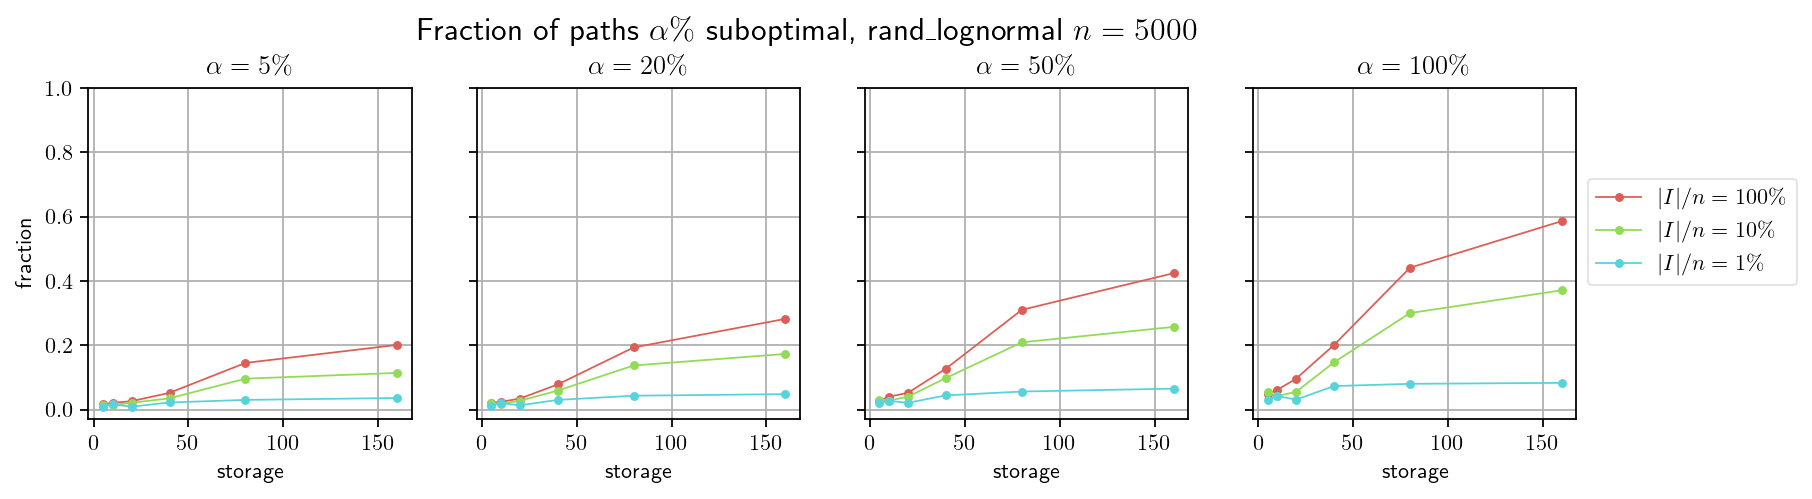

In [4]:
ldr.plot_fracs_subopt(info_ranks, list(info_ranks.keys()), fracs = [1.05, 1.2, 1.5, 2.0], 
                      dpi=160, figsize=(12, 3), marker='.', 
                      mtype=mtype+r" $n=%d$"%(n), 
                      ylim=[-3e-2, 1])

In [5]:
info_ranks.keys()

dict_keys([10, 160, 20, 40, 5, 80])

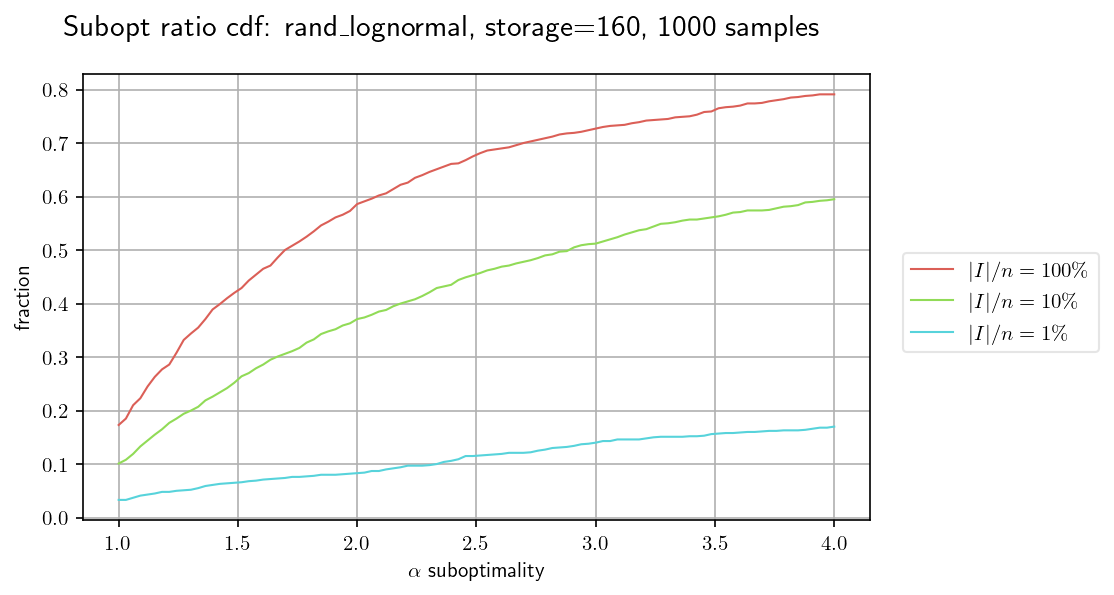

In [7]:
rank = 160
ldr.plot_cdf_algo_subopt_ratio(info_ranks[rank], title=f"{mtype}, storage={rank}")

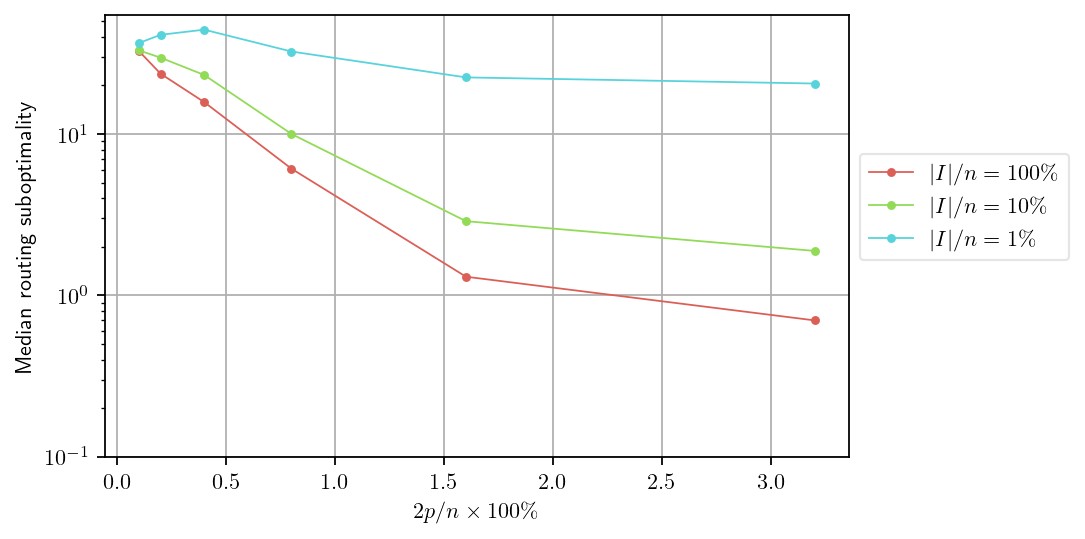

In [8]:
ldr.plot_median_storage(n, info_ranks, list(info_ranks.keys()), 
                      dpi=160, figsize=(6, 4), marker='.', 
                      mtype=mtype+r" $n=%d$"%(n),
                      yticks=[1e-1, 1, 10],
                      yscale='log')

In [13]:
r = list(info_ranks.keys())[0]
algos = sorted(info_ranks[r].keys())

ranks = np.array(sorted(info_ranks.keys()))

emb_rel_diff = {algo:[] for algo in algos}
for rank in ranks:
    rats = info_ranks[rank][r"$|I|/n=100\%$"]
    print(rank, np.round(rank / n  * 100, 1), np.median(rats["ratios"]))
    ldr.print_stats_moments(rats["r_rel_diff"])
    ldr.print_stats_moments(rats["c_rel_diff"])

5 0.1 33.767445459097736
mean=13.14, M=8.94, SD=26.42, q_25=4.40, q_75=14.64, max=10204.88, min=0.00
mean=13.14, M=8.94, SD=26.42, q_25=4.40, q_75=14.64, max=10204.88, min=0.00
10 0.2 24.66330111821518
mean=13.03, M=8.88, SD=25.85, q_25=4.35, q_75=14.61, max=10216.52, min=0.00
mean=13.03, M=8.88, SD=25.85, q_25=4.35, q_75=14.61, max=10216.52, min=0.00
20 0.4 16.77530367154229
mean=12.77, M=8.73, SD=24.98, q_25=4.26, q_75=14.48, max=9813.60, min=0.00
mean=12.77, M=8.73, SD=24.98, q_25=4.26, q_75=14.48, max=9813.60, min=0.00
40 0.8 7.098417795507245
mean=12.23, M=8.42, SD=23.33, q_25=4.07, q_75=14.13, max=9334.65, min=0.00
mean=12.23, M=8.42, SD=23.33, q_25=4.07, q_75=14.13, max=9334.65, min=0.00
80 1.6 2.3054394828454186
mean=11.34, M=7.89, SD=20.88, q_25=3.78, q_75=13.47, max=8028.73, min=0.00
mean=11.34, M=7.89, SD=20.88, q_25=3.78, q_75=13.47, max=8028.73, min=0.00
160 3.2 1.6994434916201036
mean=10.70, M=7.37, SD=20.35, q_25=3.55, q_75=12.45, max=7384.63, min=0.00
mean=10.70, M=7.37

In [11]:
ranks / n * 100

array([0.1, 0.2, 0.4, 0.8, 1.6, 3.2])

In [14]:
r = list(info_ranks.keys())[0]
algos = sorted(info_ranks[r].keys())

ranks = np.array(sorted(info_ranks.keys()))

emb_rel_diff = {algo:[] for algo in algos}
for rank in ranks:
    rats = info_ranks[rank][r"$|I|/n=10\%$"]
    print(rank, np.round(rank / n  * 100, 1), np.median(rats["ratios"]))
    ldr.print_stats_moments(rats["r_rel_diff"])
    ldr.print_stats_moments(rats["c_rel_diff"])

5 0.1 34.03797194843733
mean=12.88, M=8.78, SD=25.17, q_25=4.30, q_75=14.45, max=6585.70, min=0.00
mean=13.02, M=8.84, SD=26.34, q_25=4.34, q_75=14.53, max=6666.08, min=0.00
10 0.2 30.750438549840077
mean=12.76, M=8.71, SD=24.74, q_25=4.26, q_75=14.41, max=6755.99, min=0.00
mean=12.85, M=8.74, SD=25.74, q_25=4.28, q_75=14.46, max=7062.89, min=0.00
20 0.4 24.23341168178402
mean=12.38, M=8.48, SD=23.55, q_25=4.11, q_75=14.20, max=6202.10, min=0.00
mean=12.50, M=8.54, SD=24.52, q_25=4.15, q_75=14.28, max=6202.10, min=0.00
40 0.8 11.01316169208586
mean=11.60, M=8.03, SD=21.30, q_25=3.84, q_75=13.70, max=6794.82, min=0.00
mean=11.75, M=8.12, SD=22.32, q_25=3.90, q_75=13.79, max=6794.82, min=0.00
80 1.6 3.883717583439368
mean=10.52, M=7.36, SD=18.49, q_25=3.49, q_75=12.73, max=4839.19, min=0.00
mean=10.63, M=7.42, SD=19.51, q_25=3.53, q_75=12.79, max=5350.97, min=0.00
160 3.2 2.8856410820725733
mean=9.94, M=6.81, SD=18.46, q_25=3.26, q_75=11.64, max=4088.34, min=0.00
mean=10.05, M=6.87, SD=1